In [1]:
import os
import shutil
import numpy as np
from pathlib import Path
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [2]:
# Get base project directory
project_path = Path(os.getcwd()).parent.parent
datapath = (project_path /'data/processed/')

CLASSES = {0 : 'yes', 1 : 'no'}

In [3]:
# Loops through pathlist and reads and resizes images
def read_image(pathlist : list, size : int)-> list:
    data = []
    for path in pathlist:
        image=load_img(path, color_mode='grayscale', target_size=(size, size))
        image=img_to_array(image)
        image=image/255.0
        data.append(image)
    return data

# Makes input and label data from folder locations.
# Loops through location "subfolder/CLASSES"
def get_sets(subfolder : str, CLASSES : dict, size : int) -> tuple[list, list]:
    folder_paths = []
    folder_labels = []
    labels = []
    for k,v in CLASSES.items():
        # input datapath generation
        folder_paths += list((datapath / f"2_split_{v}/{subfolder}").rglob("*"))
    # Label data generation
    folder_labels = [0 if x.stem.split('_')[1] == 'yes' else 1 for x in folder_paths]
    # Extract images from datapaths
    img_list = read_image(folder_paths, size)

    return img_list, folder_labels

# Dataset inspect

In [4]:
# Read images to variables
size = 224
X_train, y_train = get_sets('train', CLASSES, size)
X_val, y_val = get_sets('val', CLASSES, size)
X_test, y_test = get_sets('test', CLASSES, size)

In [5]:
# Dataset distribution
print(len(X_train), len(y_train))
print(len(X_val), len(y_val))
print(len(X_test), len(y_test))

125 125
42 42
42 42


In [6]:
# Shapes of dataset
print(f"shape train x: {np.array(X_train).shape} label shape: {np.array(y_train).shape} ")
print(f"shape validation x: {np.array(X_val).shape} label shape: {np.array(y_val).shape} ")
print(f"shape test x: {np.array(X_test).shape} label shape: {np.array(y_test).shape} ")

shape train x: (125, 224, 224, 1) label shape: (125,) 
shape validation x: (42, 224, 224, 1) label shape: (42,) 
shape test x: (42, 224, 224, 1) label shape: (42,) 


In [7]:
# Label distribution
print(f"Train yes: {np.unique(y_train, return_counts=True)[1][0]} Train no: {np.unique(y_train, return_counts=True)[1][1]}")
print(f"Validation yes: {np.unique(y_val, return_counts=True)[1][0]} Validation no: {np.unique(y_val, return_counts=True)[1][1]}")
print(f"Test yes: {np.unique(y_test, return_counts=True)[1][0]} Test no: {np.unique(y_test, return_counts=True)[1][1]}")

Train yes: 79 Train no: 46
Validation yes: 24 Validation no: 18
Test yes: 30 Test no: 12


In [8]:
# Unique labels
print(f"Possible labels: {np.unique(y_train+ y_val + y_test)}")


Possible labels: [0 1]


In [9]:
# Max min labeldata expected 0 - 1 as a normalization was done during read of the files
print(f"X min value: {np.amin(X_test)}\nX max value: {np.amax(X_test)}")

X min value: 0.0
X max value: 1.0


# Picture inspect

In [10]:
def classplot(nClass:int, subc:int, subr:int, x:list, y:np.array):
    """Plots random pictures(x) from set class(found in y). Number of pictures subc * subr

    Args:
        nClass (int): Classnumber
        subc (int): Plot number of columns
        subr (int): Plot number of rows
        x (list): Image list to plot images from
        y (np.array): Label list to find indexnumbers from
    """
    randclass_list = np.random.choice(np.array(np.where(np.asarray(y) == nClass))[0], subc*subr, replace=False)

    plt.figure(figsize=(8,8))
    for i, num in enumerate(randclass_list):
        plt.subplot(subc,subr, i+1)
        plt.imshow(x[num], cmap='gray')
        plt.title("Class {}".format(y[num]))

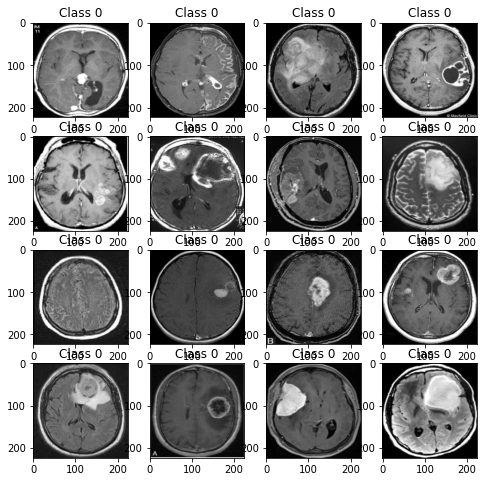

In [11]:
classplot(0, 4, 4, X_train, y_train)

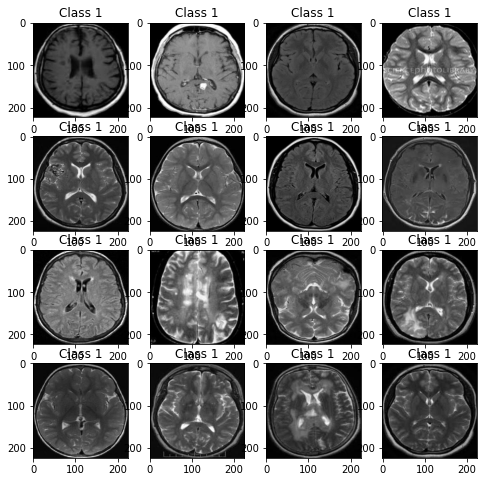

In [12]:
classplot(1, 4, 4, X_train, y_train)

The variation of contrast are big even within the same areas of the brains. Sometimes the brain wrinkles are darker areas and sometimes they are lit up. 
This seems to be the case of both classes. So well need to see if its possible to normalize to get about the same result.

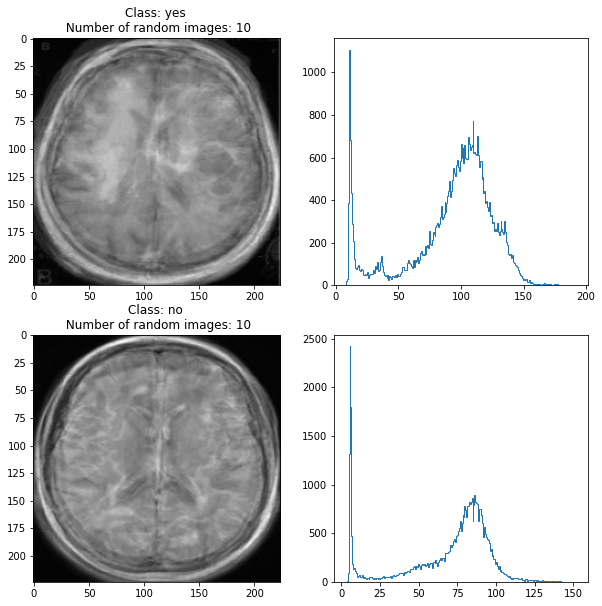

In [13]:
image_num = 10

fig, ax = plt.subplots(2,2, figsize=(10,10))

for i, k in enumerate(CLASSES):
    index_list = np.random.choice(np.asarray(np.where(np.asarray(y_train) == k)).ravel(), image_num, replace=False)
    histmean = np.sum(np.array(X_train)[index_list]*255, axis=0)/len(index_list)
    ax[i][0].set_title(f"Class: {CLASSES[k]} \n Number of random images: {image_num}")
    ax[i][0].imshow(histmean, cmap='gray')
    ax[i][1].hist(histmean.ravel(), bins = 255, histtype='step')


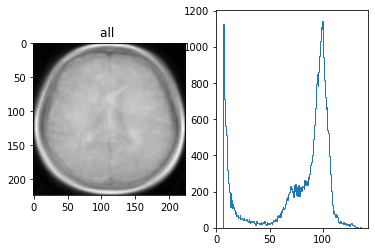

In [14]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('all ')
ax[0].imshow(np.sum(X_train, axis=0)/len(X_train), cmap='gray')
ax[1].hist(np.asarray(np.sum(np.asanyarray(X_train)*255, axis=0)/len(X_train)).flatten(), bins=255, histtype='step');